# x.grad demystified

> "An introduction to automatic differentiation with PyTorch and computing a gradient field"

- toc: false
- branch: master
- badges: true
- comments: true
- categories: [neural networks]
- image: images/Covers/2021_05_19.png
- hide: false
- search_exclude: true
- metadata_key1: metadata_value1
- metadata_key2: metadata_value2


The key algorithm of neural networks is back-propagation which applies the chain rule to compute derivatives of a function. In PyTorch, assuming you have defined a function, say `f = sin(x)`, you would compute its gradient by calling `f.backward()` followed by `x.grad`. The gradient is a function but `x.grad` returns values, so it was not immediately obvious to me what was happening. 

To remind you, the gradient of scalar function $f(x,y,z)$ is a vector field defined by:


$
    \nabla f = \begin{bmatrix}
           \frac{d f}{d x} \\
           \frac{d f}{d y} \\
           \frac{d f}{d z} \\
         \end{bmatrix}
$
  
You can sample this vector field at a given position say $(X,Y,Z)$.


$
    \nabla f(X,Y,Z) = \begin{bmatrix}
           \frac{d f(X,Y,Z)}{d x} \\
           \frac{d f(X,Y,Z)}{d y} \\
           \frac{d f(X,Y,Z)}{d z} \\
         \end{bmatrix}
$

It turns out that calling `f.backward()` computes the function $\nabla f$. When calling `x.grad`, PyTorch treats the tensor `x` as the axis $x$ and its values as the positions $X$. Thus, `x.grad` returns $\frac{d f(X,Y,Z)}{d x}$.

To illustrate this concept, let's compute the gradient of a scalar function of one or two variables.

In [1]:
# imports
import torch
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 15
plt.rcParams['figure.figsize'] = [8,8]

# Function of one variable

First, we define a tensor `X` that stores positions $X$ along axis $x$, and a tensor `F` that stores the values of function $f(x)=sin(x)$ evaluated at positions $X$. Because the `backward()` function works only on scalar values we sum the values of `F` before calling backward. This operation does not affect the derivatives.

In [2]:
n = 100
X = torch.linspace(.0,2.*np.pi,n, requires_grad=True)
F = torch.sin(X)
F.sum().backward()

Now we visualize the function (red line) and its gradient (black arrows). The gradient is computed by calling `X.grad`.

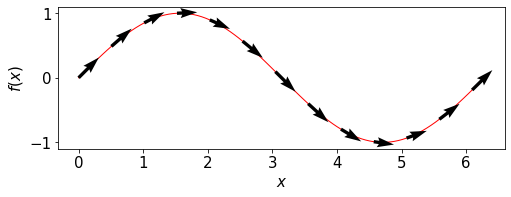

In [3]:
r = 8 # sample rate for the gradient
with torch.no_grad():
    plt.plot(X,F,'-r',lw=1,zorder=-1)
    plt.quiver(X[::r],F[::r],np.ones(n)[::r],X.grad[::r],color='k')
    
plt.axis('scaled')
plt.xlabel('$x$')
_ =plt.ylabel('$f(x)$')

# Function of two variables

We now define two 2D tensors, `X` and `Y` to store coordinates $(X,Y)$ in the space $(x,y)$. `F` stores the results of function $f(x,y)=sin(x)*cos(y)$ evaluated at positions $(X,Y)$.

In [4]:
X, Y = np.meshgrid(np.linspace(.0,2.*np.pi,n),np.linspace(.0,2.*np.pi,n))
X = torch.from_numpy(X.T)
Y = torch.from_numpy(Y.T)
X.requires_grad = True
Y.requires_grad = True
F = torch.sin(X)*torch.cos(Y)
F.sum().backward()

In two dimensions the gradient is a vector field that can be represented using a quiverplot. The scalar function $f$ is represented as a heatmap. We calculate the components of the gradient vector at each of locations stored in `(X,Y)` by calling `X.grad` and `Y.grad`.

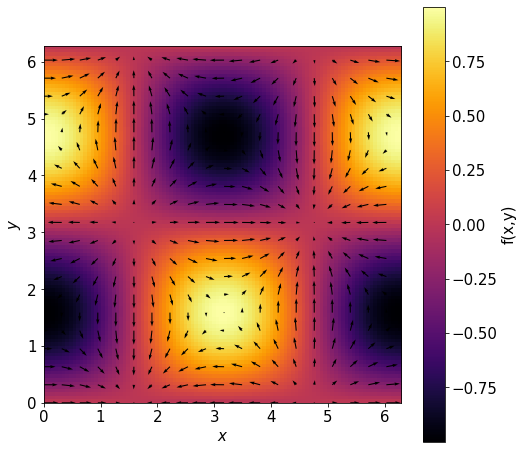

In [5]:
r = 5
with torch.no_grad():
    plt.imshow(F,
               extent=[x.item() for x in [X[0,0], X[-1,0], Y[0,0], Y[0,-1]]],
               cmap='inferno')
    plt.colorbar(label='f(x,y)')
    plt.quiver(X[::r,::r],Y[::r,::r],X.grad[::r,::r], Y.grad[::r,::r])
plt.xlabel('$x$')
_ = plt.ylabel('$y$')

# Conclusion

PyTorch's automatic differentiation is a very neat tool that allows you to easily compute gradient fields. The function `f.backward()` computes the gradient function itself while calling, `x.grad` computes the derivative of the function $f(x)$ with respect to variable $x$ at the location stored in tensor `x`. This functionality can be used to easily compute gradient vector fields in an arbtrary number of dimensions.